# Books Recommender System

## Importing the Python libraries. 

In [184]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Reading the dataset

In [185]:
df = pd.read_csv('books.csv',error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [186]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## Checkig for Null/NaN Values

In [187]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

## Exploring the data

In [188]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [189]:
df.describe() 

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [190]:
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
6422,24178,Charlotte's Web,E.B. White/Garth Williams/Rosemary Wells,4.17,0064410935,9780064410939,eng,184,1300470,14739,10/1/2001,HarperCollinsPublishers
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember


## Searching for most rated Books, Authors and Languages 

<AxesSubplot:xlabel='average_rating', ylabel='title'>

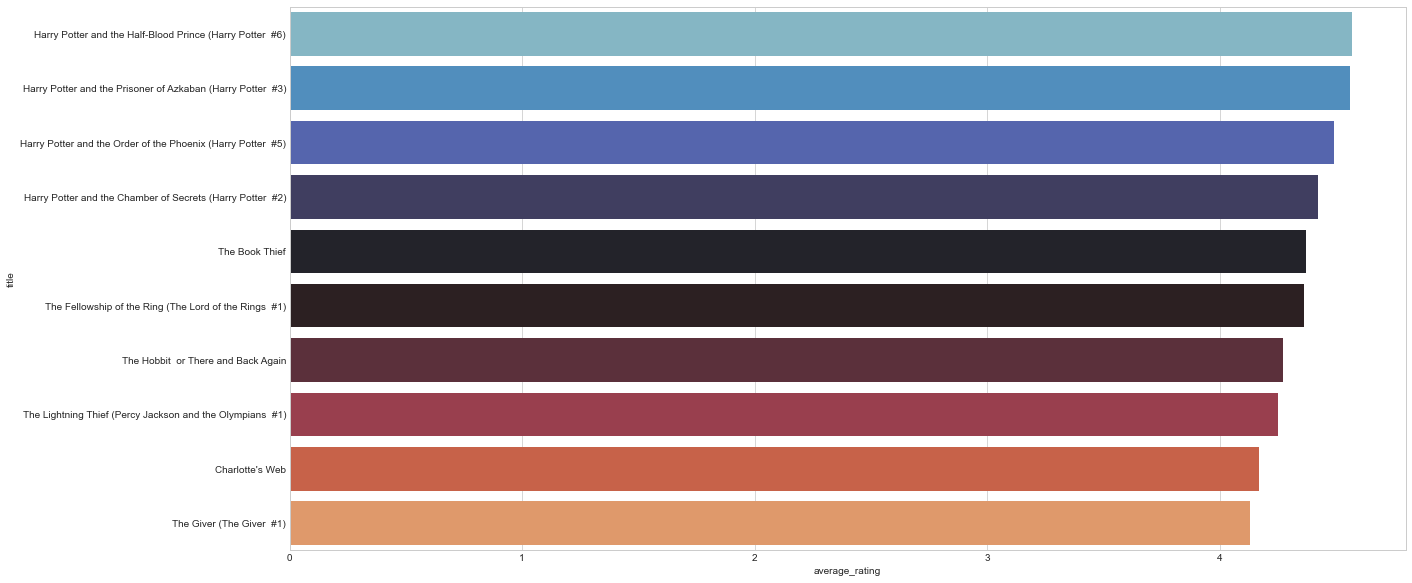

In [191]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='icefire')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


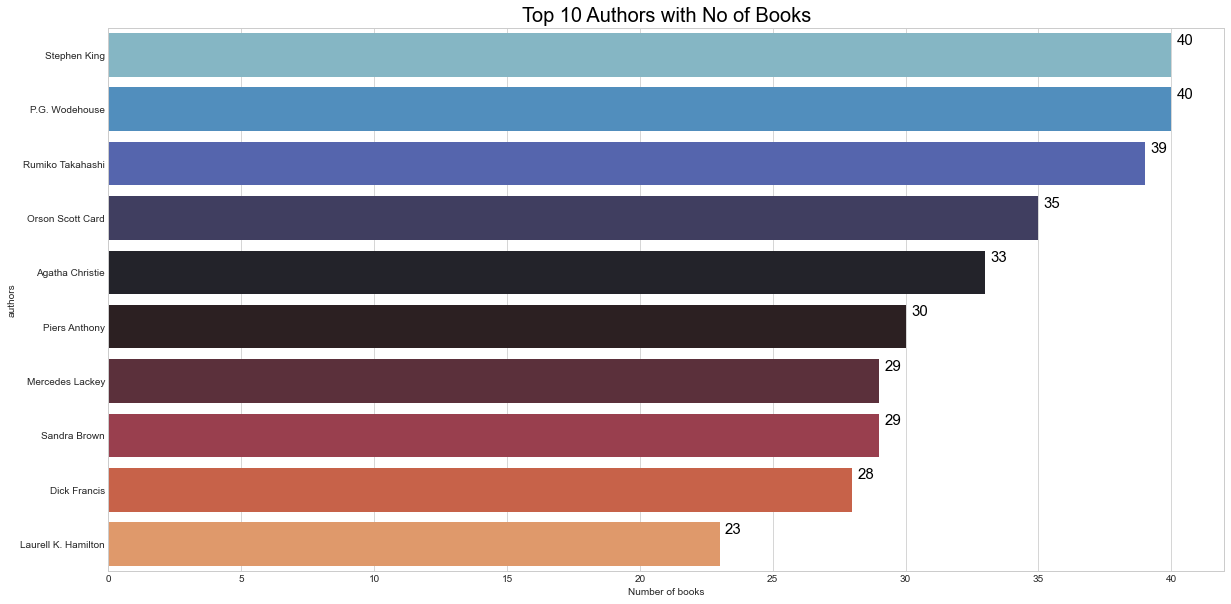

In [192]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(20,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire')
ax.set_title("Top 10 Authors with No of Books", fontsize = 20, color = 'Black')
ax.set_xlabel("Number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


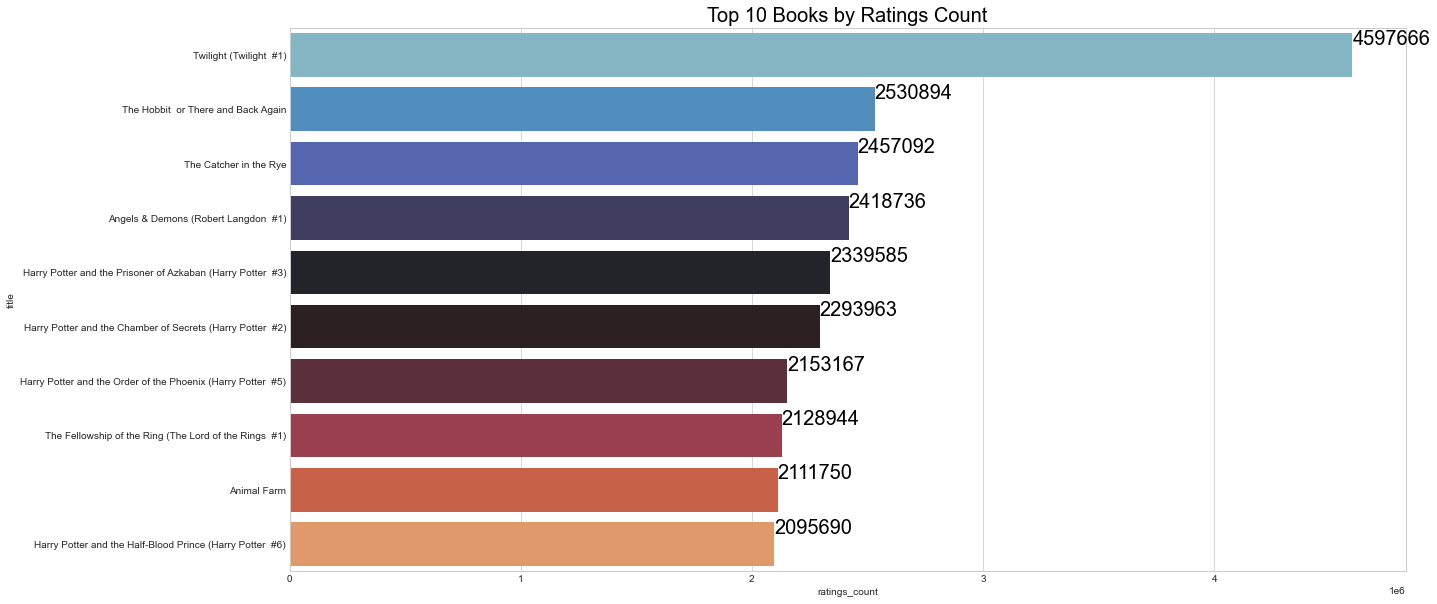

In [194]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(20,10))
ax = sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'icefire')
ax.set_title("Top 10 Books by Ratings Count", fontsize = 20, color = 'Black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=20,color='black')
plt.show()

<AxesSubplot:title={'center':'Most Preferred Languages'}, xlabel='language_code', ylabel='count'>

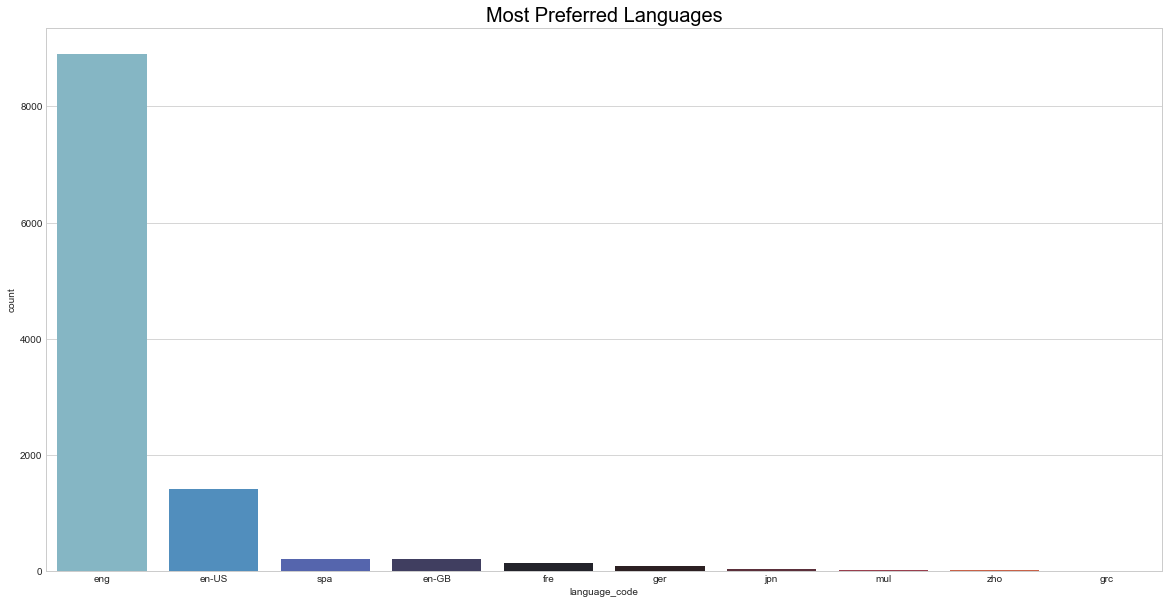

In [195]:
plt.figure(1, figsize=(20,10))
plt.title("Most Preferred Languages", fontsize = 20, color = 'Black')
sns.countplot(x = "language_code", order=df['language_code'].value_counts().index[0:10] ,data=df,palette='icefire')

## Now searching for Authors, Publishers, Avg Rating by Books

C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20161 missing 

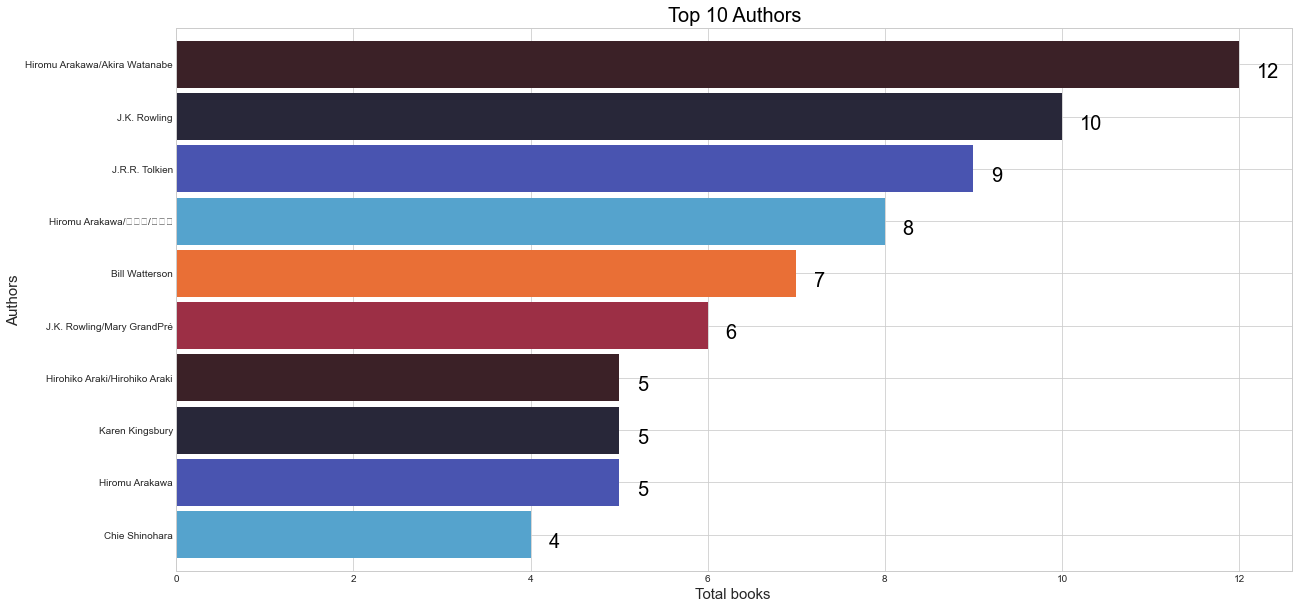

In [196]:
highly_rated_author =df[df['average_rating']>4.4]
highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(20,10))
ax = highly_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('icefire'))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 Authors",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=20,color='black')
plt.show()

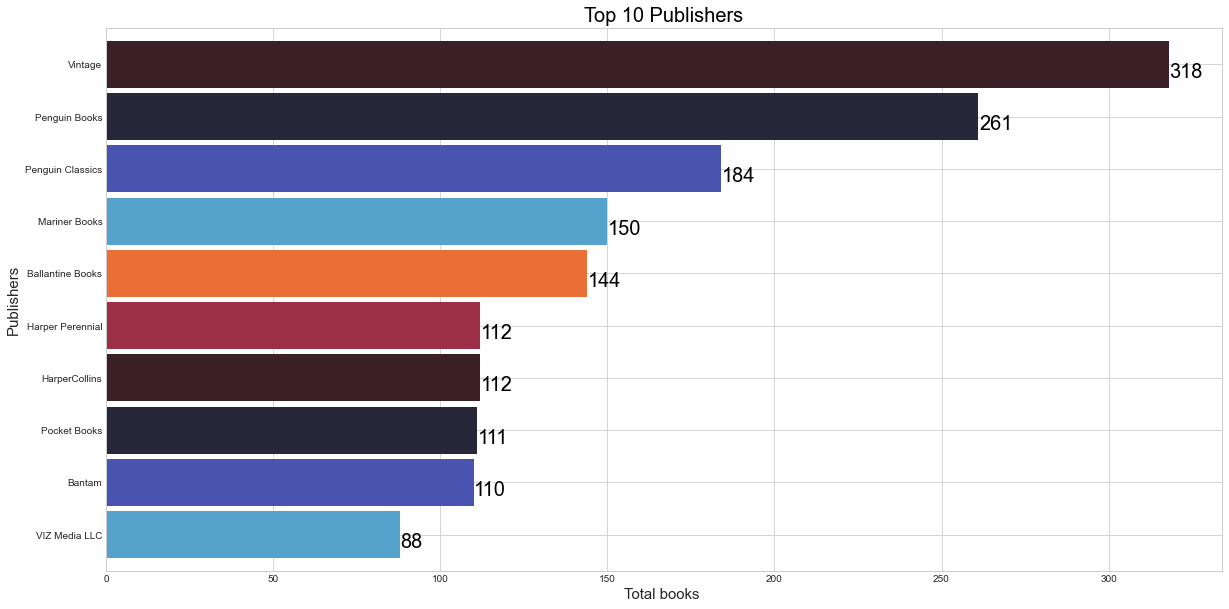

In [197]:
top_publishers = df.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(20,10))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('icefire'))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Publishers", fontsize=15)
ax.set_title("Top 10 Publishers",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=20,color='black')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


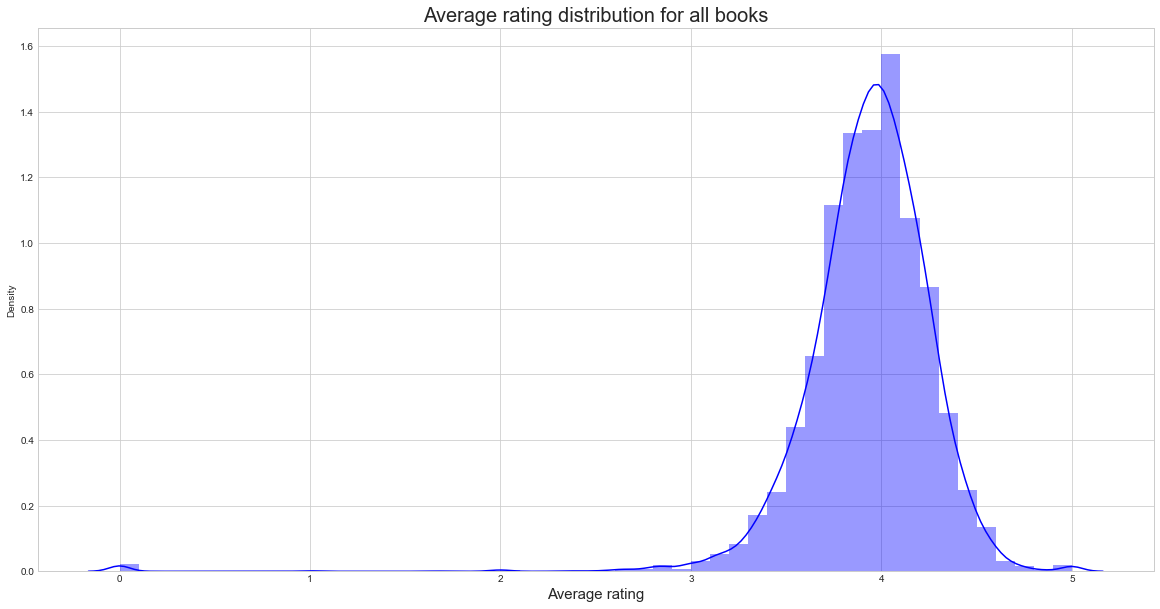

In [198]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[20,10])
sns.distplot(df['average_rating'],ax=ax, color='blue')
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=15)
plt.show()

## Comparing the other columns

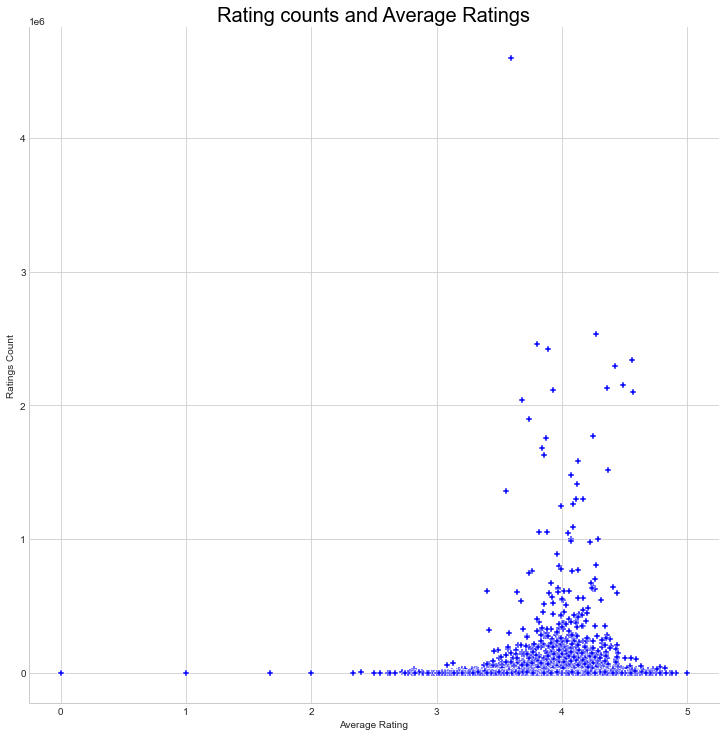

In [199]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'Blue', sizes=(100, 200), height=10, marker='P')
plt.title("Rating counts and Average Ratings",fontsize = 20, color = 'Black')
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1440x720 with 0 Axes>

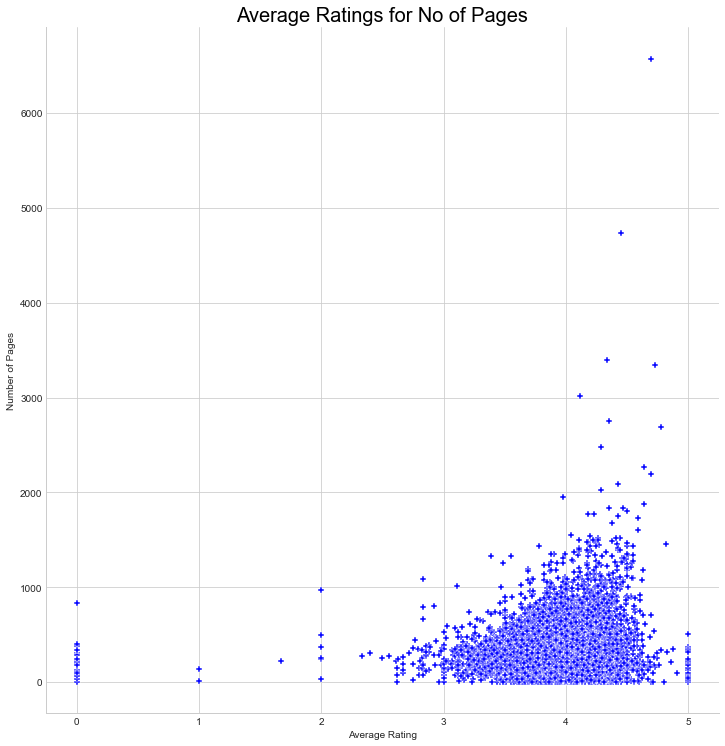

In [200]:
plt.figure(figsize=(20,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'Blue',sizes=(100, 200), height=10, marker='P')
plt.title("Average Ratings for No of Pages",fontsize = 20, color = 'Black')
ax.set_axis_labels("Average Rating", "Number of Pages")

<Figure size 1440x720 with 0 Axes>

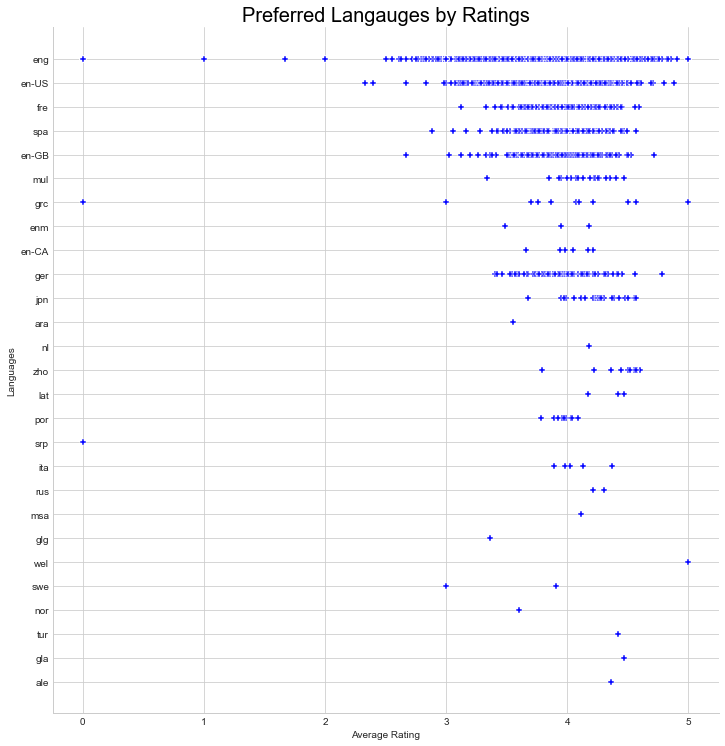

In [201]:
plt.figure(figsize=(20,10))
ax = sns.relplot(x="average_rating", y="language_code", data = df, color = 'Blue',sizes=(100, 200), height=10, marker='P')
plt.title("Preferred Langauges by Ratings",fontsize = 20, color = 'Black')
ax.set_axis_labels("Average Rating", "Languages")

<Figure size 1440x720 with 0 Axes>

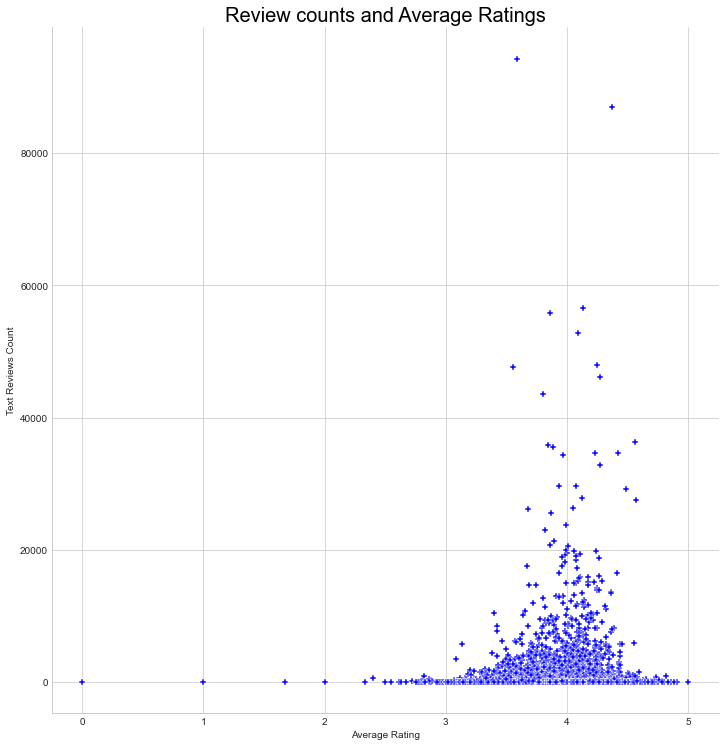

In [202]:
plt.figure(figsize=(20,10))
ax = sns.relplot(x="average_rating", y="text_reviews_count", data = df, color = 'Blue',sizes=(100, 200), height=10, marker='P')
plt.title("Review counts and Average Ratings",fontsize = 20, color = 'Black')
ax.set_axis_labels("Average Rating", "Text Reviews Count")


## Creating a copy of main data and neglecting the unecessary columns 

In [203]:
df2 = df.copy()

In [204]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [205]:
df2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


## Dividing average rating column in categories such as rating between 0 and 1, 1 and 2, etc. For better predictions

In [206]:
rating_df = pd.get_dummies(df2['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [207]:
language_df = pd.get_dummies(df2['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
features = pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


## To reduce the values, using the Min-Max scaler

In [209]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

## Using KNN algorithm for recommendation

In [210]:
model = neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

## Creating a function to find books using the features.

In [211]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name
    


## Now it will return the output based on the input provided

In [212]:
BookNames = BookRecommender('Neither Here nor There: Travels in Europe')
BookNames

['Neither Here nor There: Travels in Europe',
 'Lasher (Lives of the Mayfair Witches  #2)',
 'Heretics of Dune (Dune Chronicles #5)',
 'Women',
 'Velocity',
 'The Body in the Library (Miss Marple  #3)',
 'Orlando',
 'White Noise',
 'A History of God: The 4 000-Year Quest of Judaism  Christianity  and Islam',
 'South of the Border  West of the Sun']